# **Анализ данных о психическом здоровье студентов (EDA)**

**Цель этого проекта** — провести всесторонний анализ данных и, возможно, получить ценные инсайты о проблемах психического здоровья студентов. **Главный вопрос** -  какие признаки коррелируют с тревожностью и депрессией, а также оказывают ли тревожность и депрессия негативное влияние на средний балл (CGPA).

# **1. Открытие файла**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/DF_mentalhealth.csv')

df.head(10)

,Timestamp,Gender,Age,Course,YearOfStudy,CGPA,Depression,Anxiety,PanicAttack,SpecialistTreatment,SymptomFrequency_Last7Days,HasMentalHealthSupport,SleepQuality,StudyStressLevel,StudyHoursPerWeek,AcademicEngagement
0,13/7/2020,Female,24,Biotechnology,Year 3,2.38,1,0,0,0,5,0,4,5,8,2
1,13/7/2020,Female,18,Biotechnology,Year 3,4.00,0,1,0,0,0,0,4,4,13,5
2,13/7/2020,Female,25,Biotechnology,Year 3,3.68,0,0,1,0,3,0,1,2,13,1
3,13/7/2020,Female,18,Engineering,year 4,4.00,0,0,0,0,3,0,5,1,19,2
4,13/7/2020,Female,20,Engineering,year 4,2.00,1,1,0,0,0,0,2,4,3,2
5,13/7/2020,Female,19,Engineering,year 4,4.00,0,0,1,0,4,0,4,1,15,3
6,13/7/2020,Female,25,Communication,Year 2,2.00,1,1,0,0,0,0,1,2,1,2
7,13/7/2020,Female,24,Diploma Nursing,year 2,2.72,0,0,0,0,3,0,3,5,8,2
8,13/7/2020,Female,24,Pendidikan Islam,Year 2,2.30,0,0,0,0,5,0,4,4,5,3
9,13/7/2020,Female,19,Engineering,year 1,4.00,1,1,0,0,5,0,4,2,16,3


In [3]:
df.shape

(1000, 16)

В данном датасете **1000 строк** и **16 стобцов**.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Timestamp                   1000 non-null   object 
 1   Gender                      1000 non-null   object 
 2   Age                         1000 non-null   int64  
 3   Course                      1000 non-null   object 
 4   YearOfStudy                 1000 non-null   object 
 5   CGPA                        1000 non-null   float64
 6   Depression                  1000 non-null   int64  
 7   Anxiety                     1000 non-null   int64  
 8   PanicAttack                 1000 non-null   int64  
 9   SpecialistTreatment         1000 non-null   int64  
 10  SymptomFrequency_Last7Days  1000 non-null   int64  
 11  HasMentalHealthSupport      1000 non-null   int64  
 12  SleepQuality                1000 non-null   int64  
 13  StudyStressLevel            1000 n

Виды данных во всех столбцах корректные, за исключением столбца Timestamp.




In [5]:
# Замена типа данных
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df.dtypes

<ipython-input-5-9f21b4f563ff>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')


,0
Timestamp,datetime64[ns]
Gender,object
Age,int64
Course,object
YearOfStudy,object
CGPA,float64
Depression,int64
Anxiety,int64
PanicAttack,int64
SpecialistTreatment,int64


In [6]:
df.isna().sum() # Поиск отсуствующих значений

,0
Timestamp,771
Gender,0
Age,0
Course,0
YearOfStudy,0
CGPA,0
Depression,0
Anxiety,0
PanicAttack,0
SpecialistTreatment,0


Пропущенные значения отсутствуют.

# **2. Визуализация данных**

Проанализируем **основные параметры опроса** - пол студентов, возраст, курсы и направления обучения, средние баллы.

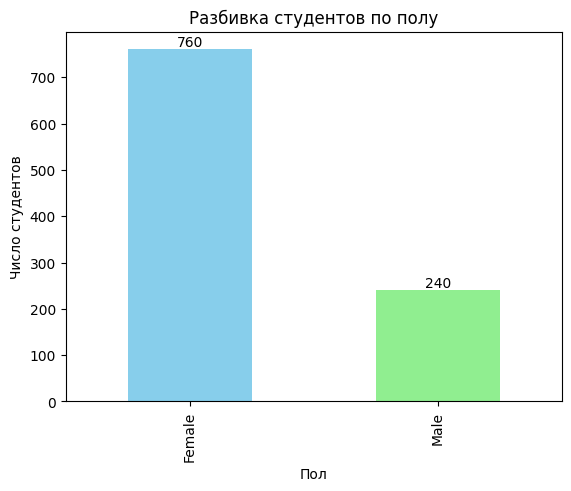

In [7]:
# Подсчет значений для столбца 'Gender'
counts = df['Gender'].value_counts()

# Построение графика
ax_gender = counts.plot(kind='bar', color=['skyblue', 'lightgreen'], title='Разбивка студентов по полу')

# Добавление числовых меток над столбцами
for i, count in enumerate(counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=10)


plt.xlabel('Пол')
plt.ylabel('Число студентов')
plt.show()


Большинство опрошенных - **женщины**.

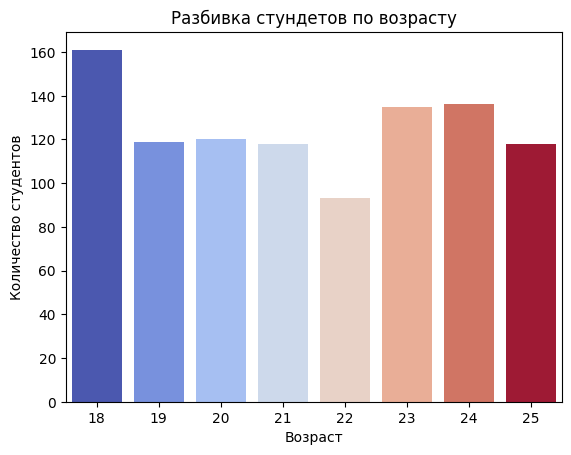

In [8]:
ax_age = sns.countplot(df, x='Age', hue = 'Age', palette='coolwarm', legend=False).set(title='Разбивка стундетов по возрасту', xlabel = 'Возраст', ylabel = 'Количество студентов');

Набор данных слегка несбалансирован, но есть достаточно выборки для возрастной группы от 18 до 25 лет. Необходимо проверить, отличается ли соотношение полов для каких-либо возрастных групп.

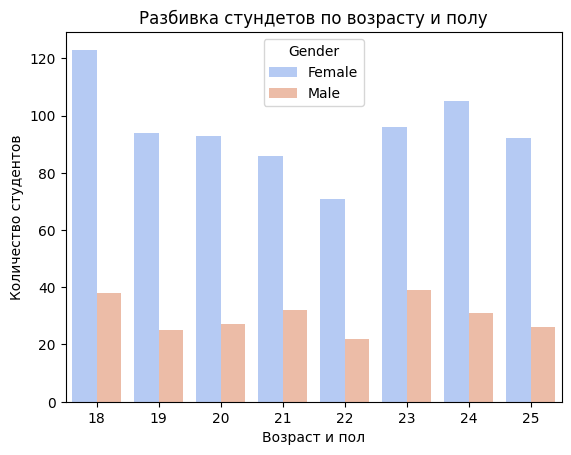

In [9]:
ax_age_gender = sns.countplot(df, x='Age', hue='Gender', palette='coolwarm').set(title='Разбивка стундетов по возрасту и полу', xlabel = 'Возраст и пол', ylabel = 'Количество студентов')


Дисбаланс полов в любой из возрастных групп отсутствует.

In [10]:
df.Course.value_counts()

,count
Course,
Engineering,180
BCS,177
BIT,101
KOE,39
Biomedical science,33
Engine,19
Laws,19
psychology,17
BENL,16


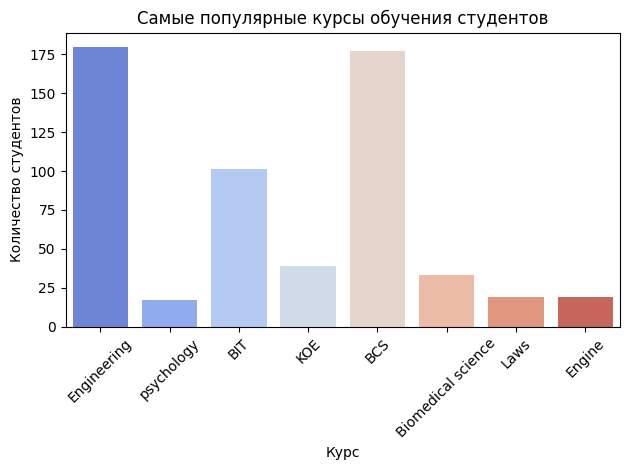

In [11]:
ax_course = sns.countplot(df[df.Course.apply(lambda x: df.Course.value_counts()[x] > 16)], x='Course', hue = 'Course', palette='coolwarm').set(title='Самые популярные курсы обучения студентов', xlabel='Курс', ylabel='Количество студентов')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show() # Выводим самые популярные направления обучения

In [12]:
df.YearOfStudy.value_counts() # Группируем суммы студентов разных годов обучения

,count
YearOfStudy,
year 1,390
Year 3,185
Year 2,178
year 2,96
year 4,74
year 3,55
Year 1,22


Необходимо скорректировать названия в столбце, так как есть дубли.

In [13]:
df.YearOfStudy = df.YearOfStudy.str.lower()
df.YearOfStudy.value_counts()

,count
YearOfStudy,
year 1,412
year 2,274
year 3,240
year 4,74


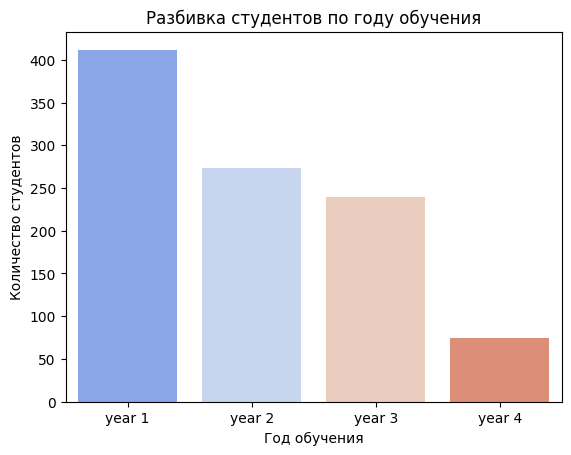

In [14]:
sns.countplot(df.sort_values(by='YearOfStudy'), x='YearOfStudy', hue = 'YearOfStudy', palette='coolwarm').set(title='Разбивка студентов по году обучения', xlabel='Год обучения', ylabel = 'Количество студентов');

**Большинство опрошенных - студенты первого курса обучения.** Вероятно, эти студенты были более мотивированы участвовать в опросе.

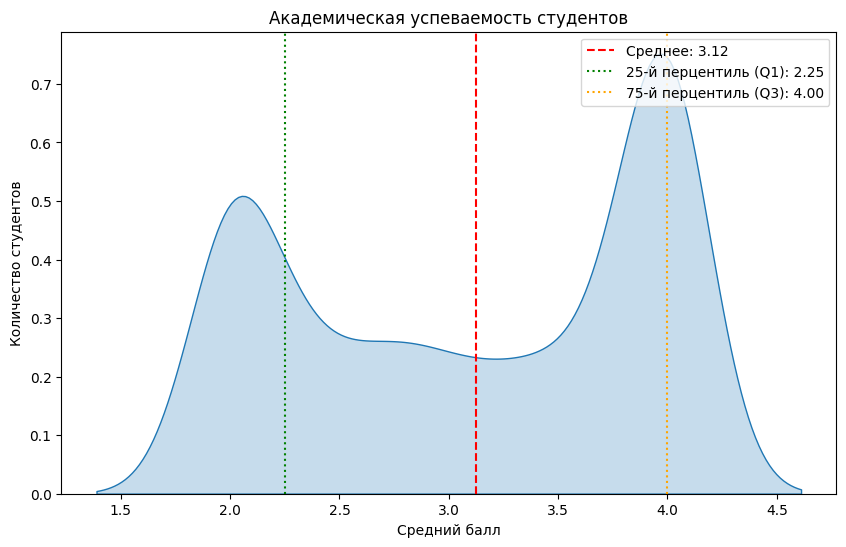

In [18]:
q1_CGPA = df['CGPA'].quantile(0.25)  # Первый квартиль (25%)
q3_CGPA = df['CGPA'].quantile(0.75)  # Третий квартиль (75%)
mean_value_CGPA = df['CGPA'].mean()
# Создаем KDE-график
plt.figure(figsize=(10, 6))
sns.kdeplot(df['CGPA'], fill=True)

# Добавляем вертикальные линии
plt.axvline(mean_value_CGPA, color='red', linestyle='--', label=f'Среднее: {mean_value_CGPA:.2f}')
plt.axvline(q1_CGPA, color='green', linestyle=':', label=f'25-й перцентиль (Q1): {q1_CGPA:.2f}')
plt.axvline(q3_CGPA, color='orange', linestyle=':', label=f'75-й перцентиль (Q3): {q3_CGPA:.2f}')

# Настройка графика
plt.title('Академическая успеваемость студентов')
plt.xlabel('Средний балл')
plt.ylabel('Количество студентов')
plt.legend()
plt.show()

Наблюдается **два пика**: на уровне **4.0 (отличная успеваемость)** и 2.0 (плохая успеваемость). **Среднее значение** балла - **3.12**, а **большая часть значений** лежит в области между 1 и 3 квартилями, т.е. **в области от 2.25 до 4.00.**

# **3. Визуализация данных о состоянии депрессии у студентов**

[Text(0.5, 1.0, 'Уровень депрессии среди студентов')]

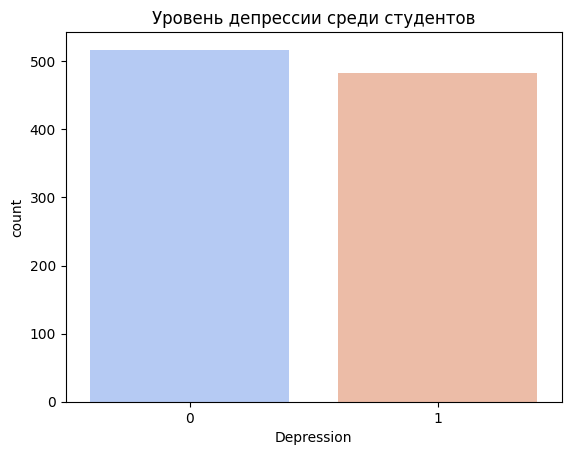

In [19]:
sns.countplot(df, x='Depression', hue = 'Depression', palette='coolwarm', legend=False).set(title='Уровень депрессии среди студентов')

Наблюдется действительно **высокий уровень депрессии**. Возможно, студенты с депрессией были более мотивированы принять участие в опросе. Необходимо проверить, зависит ли уровень депрессии от пола или года обучения.

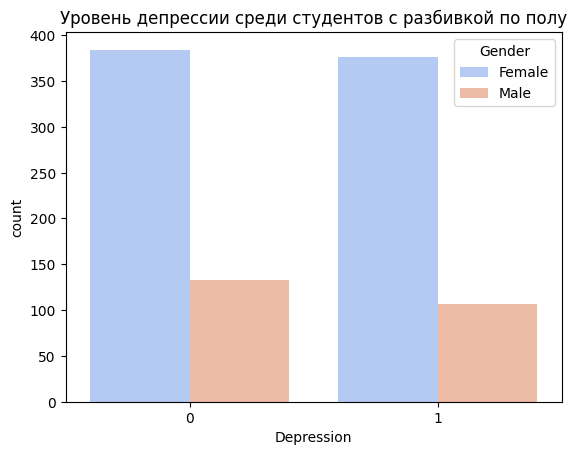

In [20]:
sns.countplot(df, x='Depression', hue='Gender', palette='coolwarm').set(title='Уровень депрессии среди студентов с разбивкой по полу');

Нет значительной разницы в уровне депрессии между полами.

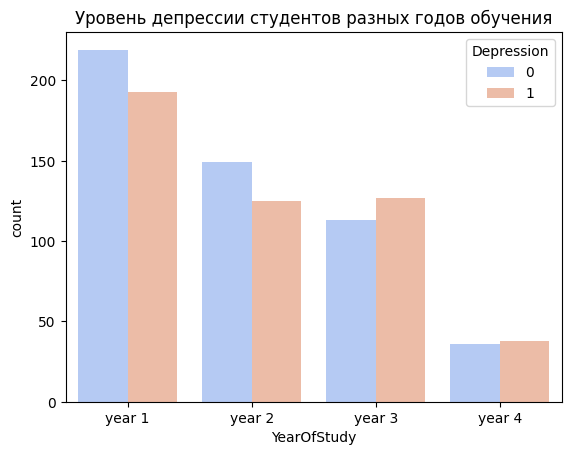

In [22]:
sns.countplot(df.sort_values(by='YearOfStudy'), hue='Depression', x='YearOfStudy', palette = 'coolwarm').set(title='Уровень депрессии студентов разных годов обучения');

**Уровень депрессии** высок среди участников всех курсов обучения, но он **выше среди студентов 3 и 4 курсов**.

# **4. Визуализация данных о состоянии тревожности у студентов**

[Text(0.5, 1.0, 'Уровень тревожности среди студентов')]

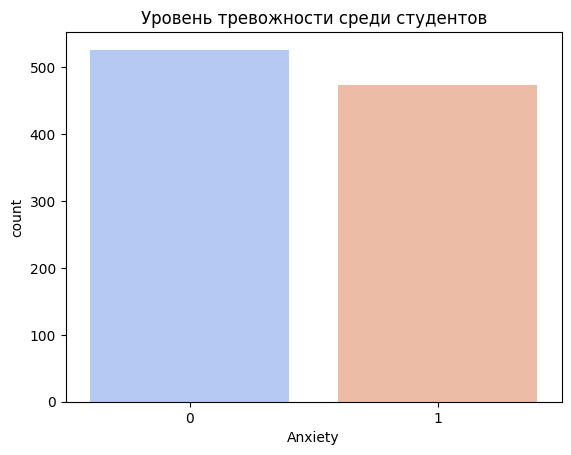

In [23]:
sns.countplot(df, x = 'Anxiety', hue = 'Anxiety', palette = 'coolwarm', legend = False).set(title='Уровень тревожности среди студентов')


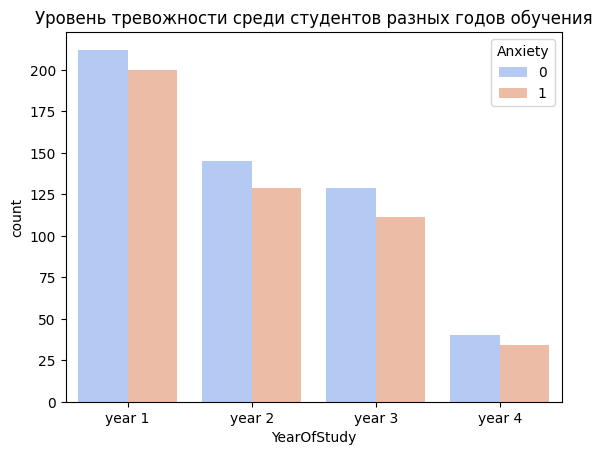

In [25]:
sns.countplot(df.sort_values(by='YearOfStudy'), hue='Anxiety', palette = 'coolwarm', x='YearOfStudy').set(title='Уровень тревожности среди студентов разных годов обучения');

**Уровень тревожности**, как и уровень депрессии, **высок среди всех студентов всех годов обучения**.

# **5. Визуализация данных о панических атаках среди студентов**

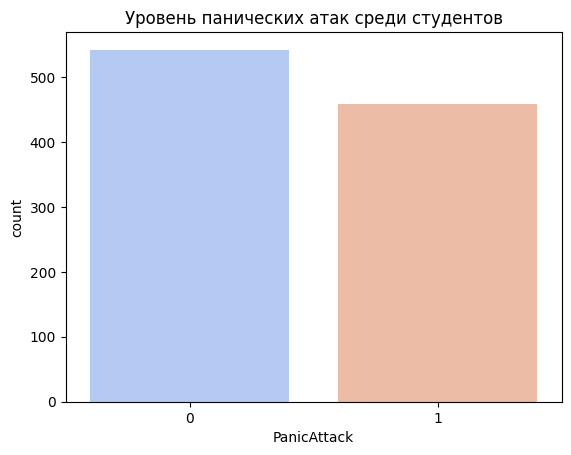

In [39]:
sns.countplot(df, x = 'PanicAttack', hue='PanicAttack', palette ='coolwarm', legend=False).set(title='Уровень панических атак среди студентов');

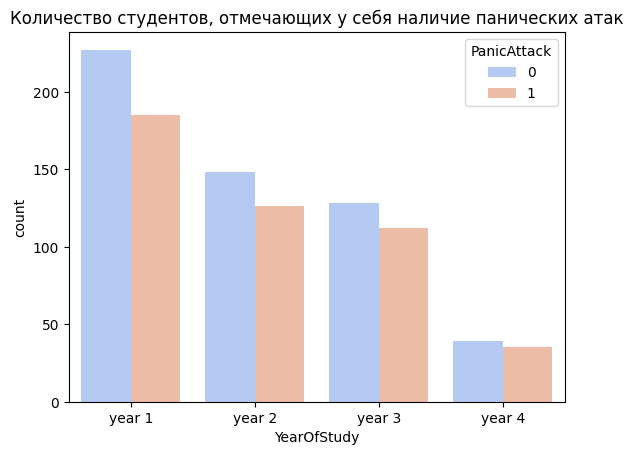

In [30]:
sns.countplot(df.sort_values(by='YearOfStudy'), hue='PanicAttack', palette='coolwarm', x='YearOfStudy').set(title='Количество студентов, отмечающих у себя наличие панических атак');

Количество студентов, отмечающих у себя наличие панических атак так же велико, как и количество студентов с депрессией и тревожностью.

# **6. Визуализация корреляционных данных**

Необходимо проверить, что депрессия, тревожность и панические атаки имеют высокую корреляцию.

In [49]:
df[['Depression', 'Anxiety', 'PanicAttack']].corr()

,Depression,Anxiety,PanicAttack
Depression,1.000000,0.048325,-0.004876
Anxiety,0.048325,1.000000,0.027768
PanicAttack,-0.004876,0.027768,1.000000


Судя по рассчетам, **корреляция практически отсутствует**.

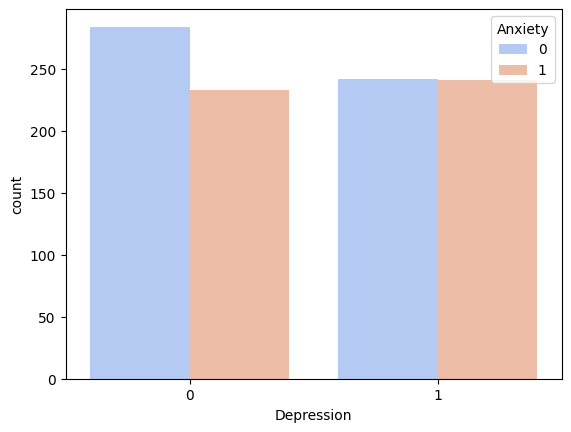

In [38]:
sns.countplot(df, x='Depression', hue='Anxiety', palette='coolwarm');

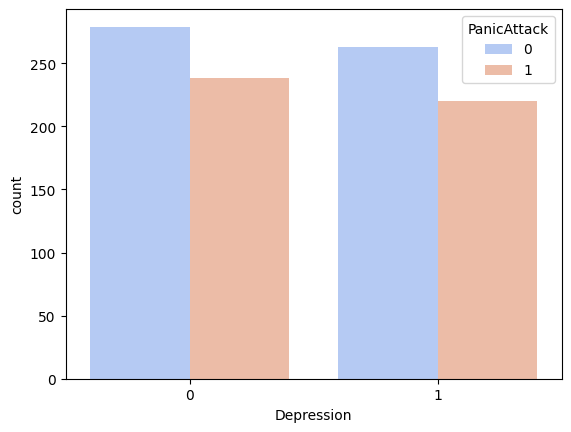

In [37]:
sns.countplot(df, x='Depression', hue='PanicAttack', palette='coolwarm');

Судя по данным, студенты с депрессией испытывают те же проблемы с тревожностью и паническими атаками, что и студенты без депрессии.

Посмотрим, как много студентов обращается за профессиональной помощью к специалистам.

In [41]:
df[(df['Depression'] == 1) & (df['SpecialistTreatment'] == 1)].shape[0], df[df['Depression'] == 1].shape[0]

(30, 483)

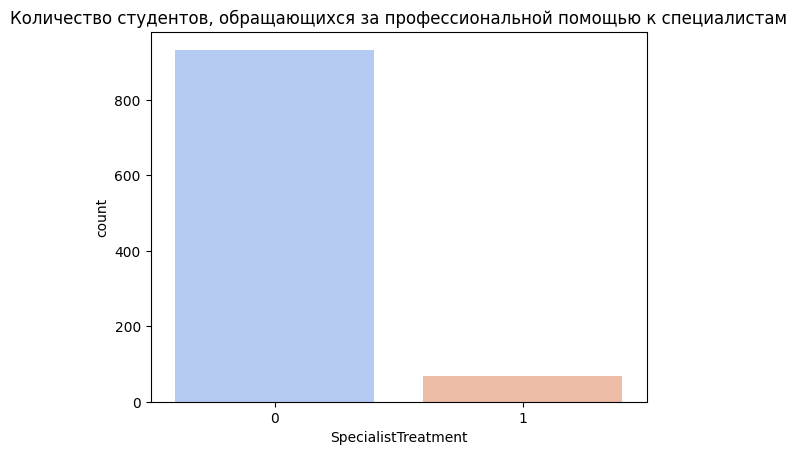

In [44]:
sns.countplot(df, x='SpecialistTreatment', hue='SpecialistTreatment', palette='coolwarm', legend=False).set(title='Количество студентов, обращающихся за профессиональной помощью к специалистам');


**Только 30 из 483 участников опроса с депрессией получают помощь специалистов.**

Также проверим параметр HasMentalHealthSupport.

In [45]:
df[(df['Depression'] == 1) & (df['HasMentalHealthSupport'] == 1)].shape[0], df[df['Depression'] == 1].shape[0]

(30, 483)

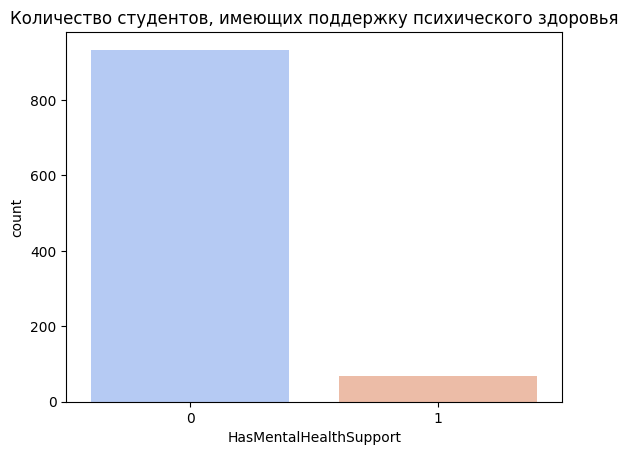

In [46]:
sns.countplot(df, x='HasMentalHealthSupport', hue='HasMentalHealthSupport', palette='coolwarm', legend=False).set(title='Количество студентов, имеющих поддержку психического здоровья');

Как и с предыдущим показателем, **только 30 из 483 участников опроса с депрессией получают поддержку ментального здоровья**.

Проверим, коррелируют ли качество сна или уровень учебного стресса с депрессией, тревожностью или паническими атаками.

In [48]:
df[['Depression', 'Anxiety', 'PanicAttack', 'SleepQuality', 'StudyStressLevel']].corr()

,Depression,Anxiety,PanicAttack,SleepQuality,StudyStressLevel
Depression,1.000000,0.048325,-0.004876,-0.016646,-0.001038
Anxiety,0.048325,1.000000,0.027768,-0.019701,0.036289
PanicAttack,-0.004876,0.027768,1.000000,-0.001719,0.052973
SleepQuality,-0.016646,-0.019701,-0.001719,1.000000,0.004863
StudyStressLevel,-0.001038,0.036289,0.052973,0.004863,1.000000


**Не наблюдается значимая корреляция** между качеством сна, уровнем учебного стресса и депрессией, тревожностью и паническими атаками. Все эти значения не влияют должным образом друг на друга как ожидалось.

Проверим последнюю значимую корреляцию - **оказывают ли тревожность и депрессия негативное влияние на средний балл (CGPA).**

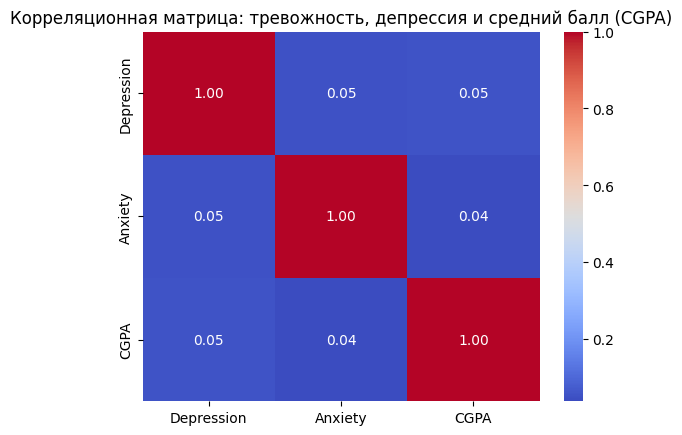

In [53]:
correlation_matrix = df[['Depression', 'Anxiety', 'CGPA']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица: тревожность, депрессия и средний балл (CGPA)')
plt.show()

Исходя из тепловой карты корреляции, можно сделать следующие выводы:

- **Корреляция между депрессией и тревожностью:** равна 0.05, что указывает на **очень слабую положительную зависимость**. Это означает, что в данном наборе данных депрессия и тревожность практически не коррелируют.

- **Корреляция между депрессией и средним баллом (CGPA):** также очень низкая — 0.05. Это говорит о том, что **между уровнем депрессии и средним баллом студентов практически нет взаимосвязи.**

- **Корреляция между тревожностью и средним баллом (CGPA)**: составляет 0.04, что также подтверждает **отсутствие значимой связи между тревожностью и академической успеваемостью студентов.**


# Общий вывод

В исследуемой выборке студентов наблюдается высокий уровень депрессии, тревожности и панических атак, причём эти проблемы присутствуют среди студентов всех годов обучения. Однако, несмотря на высокие уровни депрессии и тревожности, между этими факторами и паническими атаками корреляции практически не наблюдается. Студенты с депрессией не испытывают более выраженные проблемы с тревожностью или паническими атаками по сравнению с теми, у кого депрессия отсутствует. При этом только небольшая часть студентов с депрессией (30 из 483) получает помощь специалистов.

Также не обнаружено значимой связи между качеством сна, уровнем учебного стресса и психологическими проблемами (депрессией, тревожностью и паническими атаками). Все эти факторы не влияют друг на друга, как ожидалось, что может свидетельствовать о более сложных причинах этих состояний, не связанных с качеством сна или учебной нагрузкой.

Не обнаружено значимой связи и между депрессией, тревожностью и средним баллом (CGPA) - среди студентов имеют очень слабую взаимосвязь в этом наборе данных. Это означает, что в данном случае наличие депрессии или тревожности не влияет существенно на успеваемость студентов, по крайней мере, согласно текущим данным.